In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from pathlib import Path

In [21]:
file = Path('crypto_data.csv')

In [22]:
df = pd.read_csv(Path('crypto_data.csv'), index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [23]:
df_filtered = df[df['IsTrading'] == True]
print(df_filtered.shape)
df_filtered.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [24]:
df_dropped = df_filtered.drop(columns=["IsTrading"])
print(df_dropped.shape)
df_dropped.head()

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [25]:
df_droppedna = df_dropped.dropna()
df_droppedna.shape

(685, 5)

In [26]:
df_refiltered = df_droppedna[df_droppedna['TotalCoinsMined'] > 0] 
print(df_refiltered.shape)
df_refiltered.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [27]:
df_redropped = df_refiltered.drop(columns=["CoinName"])
print(df_redropped.shape)
df_redropped.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [28]:
X = pd.get_dummies(data=df_redropped, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(532, 98)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'], index=df_refiltered.index)
df_pca.head()

,PC1,PC2,PC3
42,-0.340437,0.935054,-0.596247
404,-0.323776,0.935105,-0.596616
1337,2.307717,1.602989,-0.679153
BTC,-0.145463,-1.329570,0.214759
ETH,-0.156538,-1.903344,0.370224


# TSNE

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(principal_components)

tsne_features.shape

(532, 2)

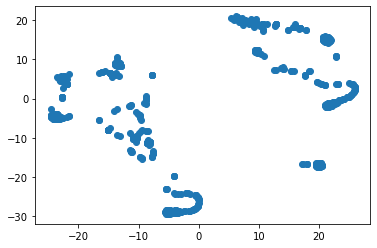

In [33]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# K-means

In [34]:
from sklearn.cluster import KMeans

In [35]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,251083.593750
1,2,105164.351562
2,3,55771.253906
3,4,34074.300781
4,5,23433.119141


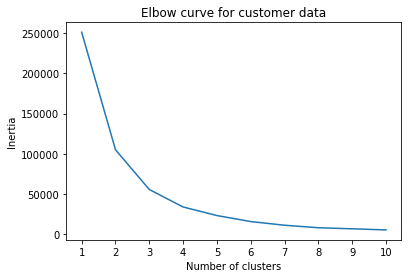

In [36]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [37]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)
predictions = model.predict(tsne_features)
predictions

array([0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2,
       0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2,
       0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2,

In [38]:
df_clustered = pd.concat([df_redropped, df_pca], axis=1)
df_clustered['Class'] = predictions
df_clustered

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.340437,0.935054,-0.596247,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.323776,0.935105,-0.596616,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.307717,1.602989,-0.679153,2
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.145463,-1.329570,0.214759,1
ETH,Ethash,PoW,1.076842e+08,0,-0.156538,-1.903344,0.370224,1
...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.468581,0.765905,-0.042445,2
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.338482,0.934939,-0.596280,0
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.326989,-2.200059,0.364906,1
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.124221,-2.044092,0.436134,1


# Conclusion:
## Based on my finding using k-mean, the cryptocurrencies be clustered into three clusters.